## Phase 1 — Data Preparation

In [ ]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np

# --- Step 2: Load the raw dataset ---
df = pd.read_csv("raw_dataset_week4.csv")

# Quick look at data
print(df.shape)
df.head()


C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\mosta\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(500, 14)


,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


In [ ]:
# Info about datatypes & missing values
df.info()

# Summary statistics
df.describe()

# Missing values count
df.isnull().sum()

# Check duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Income              450 non-null    float64
 4   Spending_Score      500 non-null    int64  
 5   Credit_Score        450 non-null    float64
 6   Loan_Amount         450 non-null    float64
 7   Previous_Defaults   500 non-null    int64  
 8   Marketing_Spend     500 non-null    int64  
 9   Purchase_Frequency  500 non-null    int64  
 10  Seasonality         500 non-null    object 
 11  Sales               500 non-null    int64  
 12  Customer_Churn      500 non-null    int64  
 13  Defaulted           500 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 54.8+ KB


0

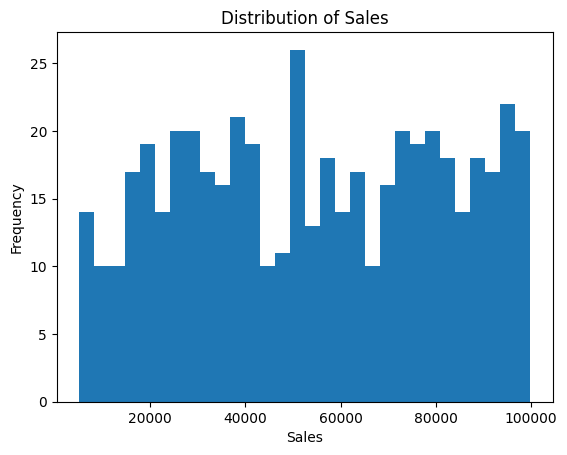

Outliers detected: 0


In [ ]:
import matplotlib.pyplot as plt

# Example: Check distribution of Sales
plt.hist(df['Sales'], bins=30)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()

# Quick IQR method for outlier detection
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < Q1 - 1.5*IQR) | (df['Sales'] > Q3 + 1.5*IQR)]
print("Outliers detected:", outliers.shape[0])


In [ ]:
from sklearn.impute import KNNImputer

# Select only numeric columns for KNN
num_cols = ["Income", "Credit_Score", "Loan_Amount"]

imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Check again
print(df[num_cols].isnull().sum())


Income          0
Credit_Score    0
Loan_Amount     0
dtype: int64


In [ ]:
df.to_csv("processed_sales.csv", index=False)
print("Processed dataset saved → processed_sales.csv")

Processed dataset saved → processed_sales.csv


## Phase 2 — ML Modeling 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("processed_sales.csv")

# ==== Basic Checks ====
print("=== Dataset Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Missing Values per Column ===")
print(df.isnull().sum())

print("\n=== Duplicate Rows Count ===")
print(df.duplicated().sum())

print("\n=== Column Data Types ===")
print(df.dtypes)

# ==== Outlier Detection (IQR method) ====
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

print("\n=== Outlier Check ===")
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   Gender              500 non-null    object 
 3   Income              500 non-null    float64
 4   Spending_Score      500 non-null    int64  
 5   Credit_Score        500 non-null    float64
 6   Loan_Amount         500 non-null    float64
 7   Previous_Defaults   500 non-null    int64  
 8   Marketing_Spend     500 non-null    int64  
 9   Purchase_Frequency  500 non-null    int64  
 10  Seasonality         500 non-null    object 
 11  Sales               500 non-null    int64  
 12  Customer_Churn      500 non-null    int64  
 13  Defaulted           500 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 54.8+ KB
None

=== First 5 Rows ===


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# === 1. Target distribution (Sales) ===
print(df["Sales"].describe())
print("Skew:", df["Sales"].skew())
print("Kurtosis:", df["Sales"].kurt())
print("Correlation with Sales:\n", df.corr(numeric_only=True)["Sales"].sort_values(ascending=False))

# Interactive histogram
fig = go.Figure(data=[go.Histogram(x=df["Sales"], nbinsx=30)])
fig.update_layout(title="Distribution of Sales", xaxis_title="Sales", yaxis_title="Frequency")
fig.show()

# === 2. Feature correlations with target ===
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

# Heatmap (no xarray needed)
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="RdBu",
    zmin=-1, zmax=1
))
fig.update_layout(title="Correlation Matrix (Numeric Features)")
fig.show()

print("\nCorrelation of features with Sales:")
print(corr["Sales"].sort_values(ascending=False))

# === 3. Check categorical variables ===
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical columns:", list(categorical_cols))

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# === 4. Check numeric scales ===
print("\nNumeric column ranges:")
for col in numeric_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

# === 5. Check potential leakage columns ===
leakage_candidates = ["Customer_Churn", "Defaulted"]
valid_cols = [c for c in leakage_candidates if c in df.columns]
if valid_cols:
    print("\nLeakage candidate correlations with Sales:")
    print(df[valid_cols + ["Sales"]].corr())
else:
    print("\nNo leakage candidate columns found in dataset.")


count      500.000000
mean     54378.954000
std      27263.106468
min       5203.000000
25%      30507.500000
50%      54032.500000
75%      78523.750000
max      99835.000000
Name: Sales, dtype: float64
Skew: -0.017100357071837997
Kurtosis: -1.2243727291575333
Correlation with Sales:
 Sales                 1.000000
Income                0.090273
Customer_ID           0.067957
Previous_Defaults     0.043006
Marketing_Spend       0.039602
Customer_Churn        0.026496
Credit_Score         -0.005351
Purchase_Frequency   -0.014126
Age                  -0.014974
Defaulted            -0.023805
Spending_Score       -0.023959
Loan_Amount          -0.032630
Name: Sales, dtype: float64



Correlation of features with Sales:
Sales                 1.000000
Income                0.090273
Customer_ID           0.067957
Previous_Defaults     0.043006
Marketing_Spend       0.039602
Customer_Churn        0.026496
Credit_Score         -0.005351
Purchase_Frequency   -0.014126
Age                  -0.014974
Defaulted            -0.023805
Spending_Score       -0.023959
Loan_Amount          -0.032630
Name: Sales, dtype: float64

Categorical columns: ['Gender', 'Seasonality']

Value counts for Gender:
Gender
Male      262
Female    238
Name: count, dtype: int64

Value counts for Seasonality:
Seasonality
Medium    169
High      168
Low       163
Name: count, dtype: int64

Numeric column ranges:
Customer_ID: min=1, max=500
Age: min=18, max=69
Income: min=20055.0, max=149922.0
Spending_Score: min=1, max=99
Credit_Score: min=300.0, max=848.0
Loan_Amount: min=5163.0, max=49936.0
Previous_Defaults: min=0, max=2
Marketing_Spend: min=1024, max=19990
Purchase_Frequency: min=1, max=29
Sales:

## regression

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/processed_sales.csv")

# Drop leakage columns
df = df.drop(["Customer_Churn", "Defaulted"], axis=1)

df.head()


,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales
0,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526
1,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493
2,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198
3,4,32,Female,43596.2,34,644.0,25103.0,2,4868,8,Medium,48395
4,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031


In [10]:
 #======================
# 2. Feature Engineering
# ======================

# Ratios / Interactions
df["Debt_to_Income"] = df["Loan_Amount"] / (df["Income"] + 1)
df["Engagement_Score"] = df["Spending_Score"] * df["Purchase_Frequency"]

# Log transformations for skewed features
for col in ["Income", "Loan_Amount", "Sales"]:
    df[col + "_log"] = np.log1p(df[col])

# Age groups
df["Age_Group"] = pd.cut(df["Age"],
                         bins=[18, 30, 45, 60, 100],
                         labels=["Young", "Adult", "Mid_Age", "Senior"])

# Credit score categories
df["Credit_Category"] = pd.cut(df["Credit_Score"],
                               bins=[300, 580, 670, 740, 800, 850],
                               labels=["Poor", "Fair", "Good", "Very Good", "Excellent"])


In [11]:
# Define features & target
X = df.drop(["Sales"], axis=1)
y = df["Sales"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.impute import SimpleImputer

# ======================
# 4. Preprocessing
# ======================
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [16]:
# ======================
# 5. Models + Hyperparameters
# ======================
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"regressor__alpha": [1, 10, 100]}),
    "Lasso": (Lasso(), {"regressor__alpha": [0.1, 1, 10]}),
    "RandomForest": (RandomForestRegressor(random_state=42),
                     {"regressor__n_estimators": [100, 200],
                      "regressor__max_depth": [3, 5, None]}),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42),
                         {"regressor__n_estimators": [100, 200],
                          "regressor__learning_rate": [0.05, 0.1],
                          "regressor__max_depth": [3, 5]})
}

results = {}

for name, (model, params) in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    grid = GridSearchCV(pipe, param_grid=params,
                        cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    results[name] = {
    "best_params": grid.best_params_,
    "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae": mean_absolute_error(y_test, y_pred),
    "r2": r2_score(y_test, y_pred)
}

In [17]:
# ======================
# 6. Show Results
# ======================
for model, metrics in results.items():
    print(f"\n=== {model} ===")
    print(metrics)


=== LinearRegression ===
{'best_params': {}, 'rmse': np.float64(11381.618582438992), 'mae': 8781.836479261987, 'r2': 0.8426934349877844}

=== Ridge ===
{'best_params': {'regressor__alpha': 1}, 'rmse': np.float64(11341.73806235231), 'mae': 8781.9506928743, 'r2': 0.8437938894881947}

=== Lasso ===
{'best_params': {'regressor__alpha': 10}, 'rmse': np.float64(11327.06980822869), 'mae': 8755.285381575595, 'r2': 0.8441976705071715}

=== RandomForest ===
{'best_params': {'regressor__max_depth': None, 'regressor__n_estimators': 200}, 'rmse': np.float64(306.6860744217938), 'mae': 216.53495000000035, 'r2': 0.9998857840106968}

=== GradientBoosting ===
{'best_params': {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}, 'rmse': np.float64(174.72475318718895), 'mae': 136.542955198919, 'r2': 0.9999629278593616}



Best model based on RMSE: GradientBoosting


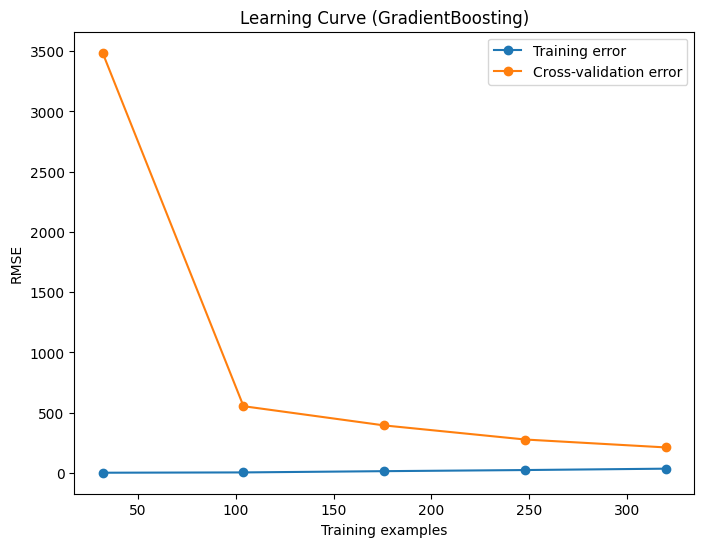

In [18]:
# ======================
# 7. Learning Curve (best model)
# ======================
best_model_name = min(results, key=lambda m: results[m]["rmse"])
print(f"\nBest model based on RMSE: {best_model_name}")

best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", models[best_model_name][0].set_params(
        **{k.replace("regressor__", ""): v for k, v in results[best_model_name]["best_params"].items()}
    ))
])

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, "o-", label="Training error")
plt.plot(train_sizes, test_scores_mean, "o-", label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.title(f"Learning Curve ({best_model_name})")
plt.legend()
plt.show()

In [19]:
results_df = pd.DataFrame(results).T
print("\n=== Model Comparison ===")
print(results_df)



=== Model Comparison ===
                                                        best_params  \
LinearRegression                                                 {}   
Ridge                                       {'regressor__alpha': 1}   
Lasso                                      {'regressor__alpha': 10}   
RandomForest      {'regressor__max_depth': None, 'regressor__n_e...   
GradientBoosting  {'regressor__learning_rate': 0.05, 'regressor_...   

                          rmse          mae        r2  
LinearRegression  11381.618582  8781.836479  0.842693  
Ridge             11341.738062  8781.950693  0.843794  
Lasso             11327.069808  8755.285382  0.844198  
RandomForest        306.686074    216.53495  0.999886  
GradientBoosting    174.724753   136.542955  0.999963  


## classfication

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, roc_auc_score,
    RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [20]:
# ======================
# 1. Load dataset
# ======================
df = pd.read_csv("/content/processed_sales.csv")

# Target: Defaulted
y = df["Defaulted"]
X = df.drop(["Customer_Churn", "Defaulted", "Sales"], axis=1)

In [21]:
# ======================
# 2. Feature Engineering
# ======================
# Original engineered features
X["Debt_to_Income"] = X["Loan_Amount"] / (X["Income"] + 1)
X["Engagement_Score"] = X["Spending_Score"] * X["Purchase_Frequency"]

for col in ["Income", "Loan_Amount"]:
    X[col + "_log"] = np.log1p(X[col])

X["Age_Group"] = pd.cut(X["Age"], bins=[18, 30, 45, 60, 100],
                        labels=["Young", "Adult", "Mid_Age", "Senior"])
X["Credit_Category"] = pd.cut(X["Credit_Score"],
                              bins=[300, 580, 670, 740, 800, 850],
                              labels=["Poor", "Fair", "Good", "Very Good", "Excellent"])

# ======================
# 2b. New engineered features
# ======================
X["Debt_to_Credit"] = X["Loan_Amount"] / (X["Credit_Score"] + 1)
X["Income_per_Purchase"] = X["Income"] / (X["Purchase_Frequency"] + 1)
X["Spending_per_Loan"] = X["Spending_Score"] / (X["Loan_Amount"] + 1)
X["Previous_Defaults_Weighted"] = X["Previous_Defaults"] * X["Loan_Amount"]
X["Income_Spending_Interaction"] = X["Income"] * X["Spending_Score"]

In [22]:
# ======================
# 3. Train/Test split
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# ======================
# 4. Preprocessing
# ======================
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [24]:
# ======================
# 5. Preprocess train/test for SMOTE
# ======================
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)  # keep test untouched

In [25]:
# ======================
# 6. Apply SMOTE
# ======================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train)

print("Original training set class distribution:\n", y_train.value_counts())
print("Resampled training set class distribution:\n", y_train_res.value_counts())

Original training set class distribution:
 Defaulted
0    324
1     76
Name: count, dtype: int64
Resampled training set class distribution:
 Defaulted
0    324
1    324
Name: count, dtype: int64


In [26]:
# ======================
# 6. Feature importance via RandomForest
# ======================
rf_selector = RandomForestClassifier(n_estimators=200, random_state=42)
rf_selector.fit(X_train_res, y_train_res)

importances = rf_selector.feature_importances_
feature_names = numeric_features + list(preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance_df.sort_values(by="importance", ascending=False, inplace=True)

# Keep only features with importance > threshold (e.g., 0.01)
selected_features = feature_importance_df[feature_importance_df["importance"] > 0.01]["feature"].tolist()
print("\nSelected Features:", selected_features)

# Reduce dataset
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf_selector, threshold=0.01, prefit=True)
X_train_selected = selector.transform(X_train_res)
X_test_selected = selector.transform(X_test_preprocessed)


Selected Features: ['Seasonality_Low', 'Loan_Amount', 'Age', 'Income_per_Purchase', 'Loan_Amount_log', 'Income_Spending_Interaction', 'Marketing_Spend', 'Credit_Score', 'Debt_to_Credit', 'Debt_to_Income', 'Income', 'Spending_Score', 'Customer_ID', 'Engagement_Score', 'Purchase_Frequency', 'Previous_Defaults_Weighted', 'Spending_per_Loan', 'Age_Group_Mid_Age', 'Age_Group_Adult', 'Income_log', 'Seasonality_High', 'Seasonality_Medium', 'Credit_Category_Fair', 'Credit_Category_Poor', 'Gender_Male', 'Previous_Defaults', 'Gender_Female', 'Age_Group_Senior', 'Age_Group_Young']


In [27]:
# ======================
# 7. Model Training with selected features
# ======================
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {"C": [0.1, 1, 10]}),
    "RandomForest": (RandomForestClassifier(random_state=42), {"n_estimators": [100, 200], "max_depth": [3, 5, None]}),
    "GradientBoosting": (GradientBoostingClassifier(random_state=42), {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]})
}

results = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, param_grid=params, cv=5, scoring="roc_auc", n_jobs=-1)
    grid.fit(X_train_selected, y_train_res)

    y_pred = grid.predict(X_test_selected)
    y_proba = grid.predict_proba(X_test_selected)[:,1] if hasattr(grid, "predict_proba") else grid.decision_function(X_test_selected)

    results[name] = {
        "best_params": grid.best_params_,
        "roc_auc": roc_auc_score(y_test, y_proba),
        "classification_report": classification_report(y_test, y_pred)
    }

In [28]:
# ======================
# 8. Show results
# ======================
for model, metrics in results.items():
    print(f"\n=== {model} ===")
    print("Best params:", metrics["best_params"])
    print("\nClassification Report:\n", metrics["classification_report"])
    print("ROC-AUC:", metrics["roc_auc"])


=== LogisticRegression ===
Best params: {'C': 10}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.57      0.68        81
           1       0.22      0.53      0.31        19

    accuracy                           0.56       100
   macro avg       0.53      0.55      0.49       100
weighted avg       0.72      0.56      0.61       100

ROC-AUC: 0.5230669265756985

=== RandomForest ===
Best params: {'max_depth': None, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        81
           1       0.00      0.00      0.00        19

    accuracy                           0.76       100
   macro avg       0.40      0.47      0.43       100
weighted avg       0.65      0.76      0.70       100

ROC-AUC: 0.42690058479532156

=== GradientBoosting ===
Best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

Classificat


Best model based on ROC-AUC: LogisticRegression


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

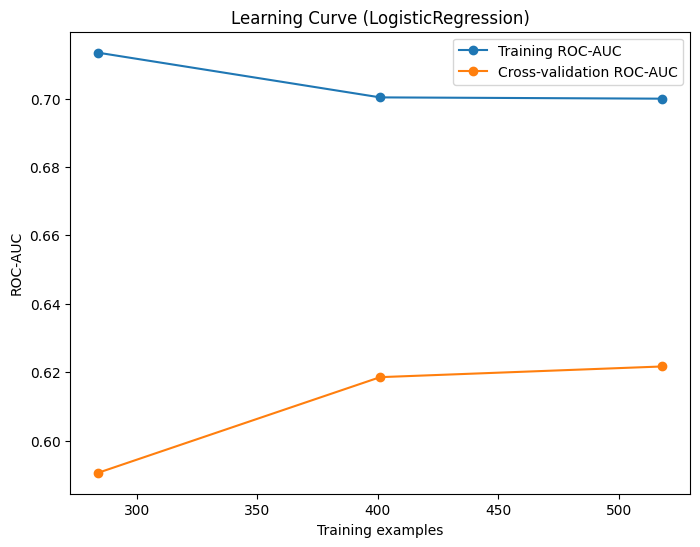

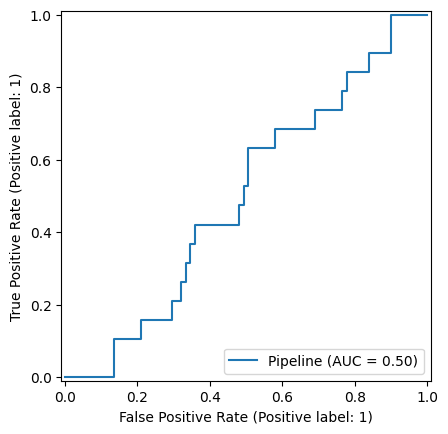

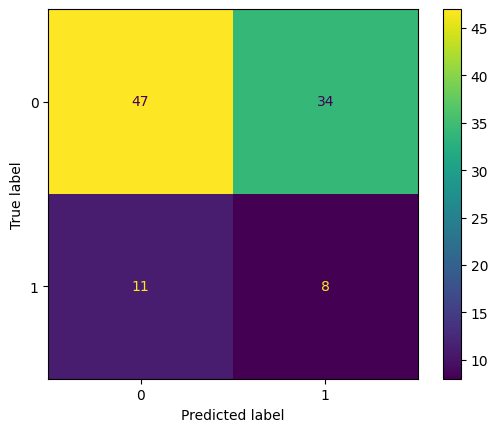

In [29]:
# ======================
# 9. Best Model Analysis (Learning Curve + ROC + Confusion Matrix)
# ======================
best_model_name = max(results, key=lambda m: results[m]["roc_auc"])
print(f"\nBest model based on ROC-AUC: {best_model_name}")

best_model = Pipeline([
    ("regressor", models[best_model_name][0].set_params(
        **{k.replace("regressor__", ""): v for k, v in results[best_model_name]["best_params"].items()}
    ))
])

best_model.fit(X_train_res, y_train_res)
y_pred_best = best_model.predict(X_test_preprocessed)
y_proba_best = best_model.predict_proba(X_test_preprocessed)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test_preprocessed)

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_res, y_train_res, cv=5,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, "o-", label="Training ROC-AUC")
plt.plot(train_sizes, test_scores_mean, "o-", label="Cross-validation ROC-AUC")
plt.xlabel("Training examples")
plt.ylabel("ROC-AUC")
plt.title(f"Learning Curve ({best_model_name})")
plt.legend()
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test_preprocessed, y_test)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [30]:
# ======================
# 10. Model Comparison Table
# ======================
comparison_data = []

for model_name, metrics in results.items():
    comparison_data.append({
        "Model": model_name,
        "ROC-AUC": metrics["roc_auc"],
        "Best_Params": metrics["best_params"]
    })

comparison_df = pd.DataFrame(comparison_data).sort_values(by="ROC-AUC", ascending=False)
comparison_df.reset_index(drop=True, inplace=True)

print("\n=== Model Comparison ===")
print(comparison_df)


=== Model Comparison ===
                Model   ROC-AUC  \
0  LogisticRegression  0.523067   
1        RandomForest  0.426901   
2    GradientBoosting  0.376868   

                                         Best_Params  
0                                          {'C': 10}  
1           {'max_depth': None, 'n_estimators': 200}  
2  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
